<a href="https://colab.research.google.com/github/Kartikay039/Data-Science-project/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython
!pip install Squiggle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.9 MB/s eta 0:00:00


In [ ]:
import plotly
import folium
import warnings
import Bio.SeqIO
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import plotly.offline as py
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from datetime import date
from Bio import pairwise2
from Bio.Data import CodonTable
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, plot_mpl

/usr/local/lib/python3.10/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning:

Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.



In [ ]:
path="/content/dataset.txt"
file=open(path,'r')
data=[[]]
for line in file:
    data.append([line])
df1=pd.DataFrame(data,columns=['sequence'])
df1=df1.drop(df1.index[0],axis=0)
df1=df1.drop(df1.index[-1],axis=0)
print(df1.shape)

(427, 1)


In [ ]:
abstracts=df1['sequence']

In [ ]:
tokenizer=tf.keras.preprocessing.text.Tokenizer(num_words=None,lower=False,char_level=True)
tokenizer.fit_on_texts(abstracts)
sequences=tokenizer.texts_to_sequences(abstracts)

In [ ]:
idx_word=tokenizer.index_word
idx_word

{1: 'T', 2: 'A', 3: 'G', 4: 'C', 5: '\n'}

In [ ]:
features=[]
labels=[]
training_length=70
num_words=len(idx_word)+1
for seq in sequences:
    for i in range(training_length,len(seq)):
        extract=seq[i-training_length:i+1]
        features.append(extract[:-2])
        labels.append(extract[-2])


label_array=np.zeros((len(features),num_words),dtype=np.int8)
for example_index,word_index in enumerate(labels):
    label_array[example_index,word_index]=1


In [ ]:
X = np.array(sequences)
y = np.array(label_array)

X = X.reshape(7,61,71)
y = y.reshape(7,61,6)
X_train, X_test = train_test_split(X, test_size=0.15, shuffle=False)
y_train, y_test = train_test_split(y, test_size=0.15, shuffle=False)

In [ ]:
y_test

array([[[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0,

In [ ]:
def get_lstm_model():

    inputs = tf.keras.layers.Input(shape=(X_train.shape[1:]))

    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(inputs)

    output = tf.keras.layers.Dense(64, activation='LeakyReLU', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4),
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    output = tf.keras.layers.Dense(32, activation='LeakyReLU', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4),
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output)
    output = tf.keras.layers.Dense(num_words, activation='softmax')(output)



    model = tf.keras.models.Model(inputs=inputs, outputs=output)

    model.compile(
        metrics = ["accuracy"],
        optimizer = tf.keras.optimizers.Adam(lr=0.002),
        loss = tf.keras.losses.CategoricalCrossentropy()
    )

    return model



In [ ]:
model = get_lstm_model()
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 61, 71)]          0         
                                                                 
 bidirectional (Bidirection  (None, 61, 256)           204800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 61, 64)            16448     
                                                                 
 dense_1 (Dense)             (None, 61, 32)            2080      
                                                                 
 dense_2 (Dense)             (None, 61, 6)             198       
                                                                 
Total params: 223526 (873.15 KB)
Trainable params: 223526 (873.15 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

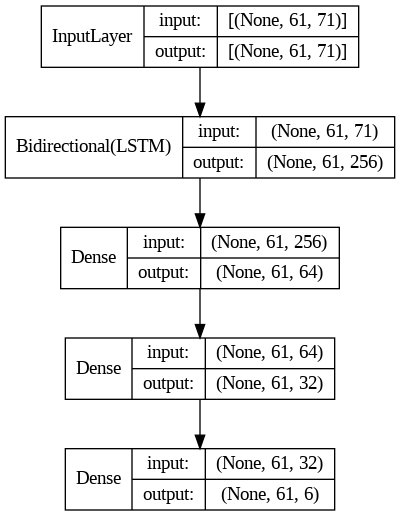

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False, to_file="lstmmodel.png")

In [ ]:
lstmhistory = model.fit(X_test, y_test, epochs=55, validation_data=(X_test, y_test), verbose=1)

Epoch 1/55
1/1 [==============================] - 6s 6s/step - loss: 1.8069 - accuracy: 0.2459 - val_loss: 1.7209 - val_accuracy: 0.2951
Epoch 2/55
1/1 [==============================] - 0s 93ms/step - loss: 1.7209 - accuracy: 0.2951 - val_loss: 1.6586 - val_accuracy: 0.2951
Epoch 3/55
1/1 [==============================] - 0s 100ms/step - loss: 1.6586 - accuracy: 0.2951 - val_loss: 1.6114 - val_accuracy: 0.2951
Epoch 4/55
1/1 [==============================] - 0s 109ms/step - loss: 1.6114 - accuracy: 0.2951 - val_loss: 1.5805 - val_accuracy: 0.2951
Epoch 5/55
1/1 [==============================] - 0s 108ms/step - loss: 1.5805 - accuracy: 0.2951 - val_loss: 1.5554 - val_accuracy: 0.2951
Epoch 6/55
1/1 [==============================] - 0s 110ms/step - loss: 1.5554 - accuracy: 0.2951 - val_loss: 1.5253 - val_accuracy: 0.2951
Epoch 7/55
1/1 [==============================] - 0s 108ms/step - loss: 1.5253 - accuracy: 0.2951 - val_loss: 1.4932 - val_accuracy: 0.3115
Epoch 8/55
1/1 [========

In [ ]:
def print_acc(history):
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.suptitle('Optimizer : Adam', fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.show()

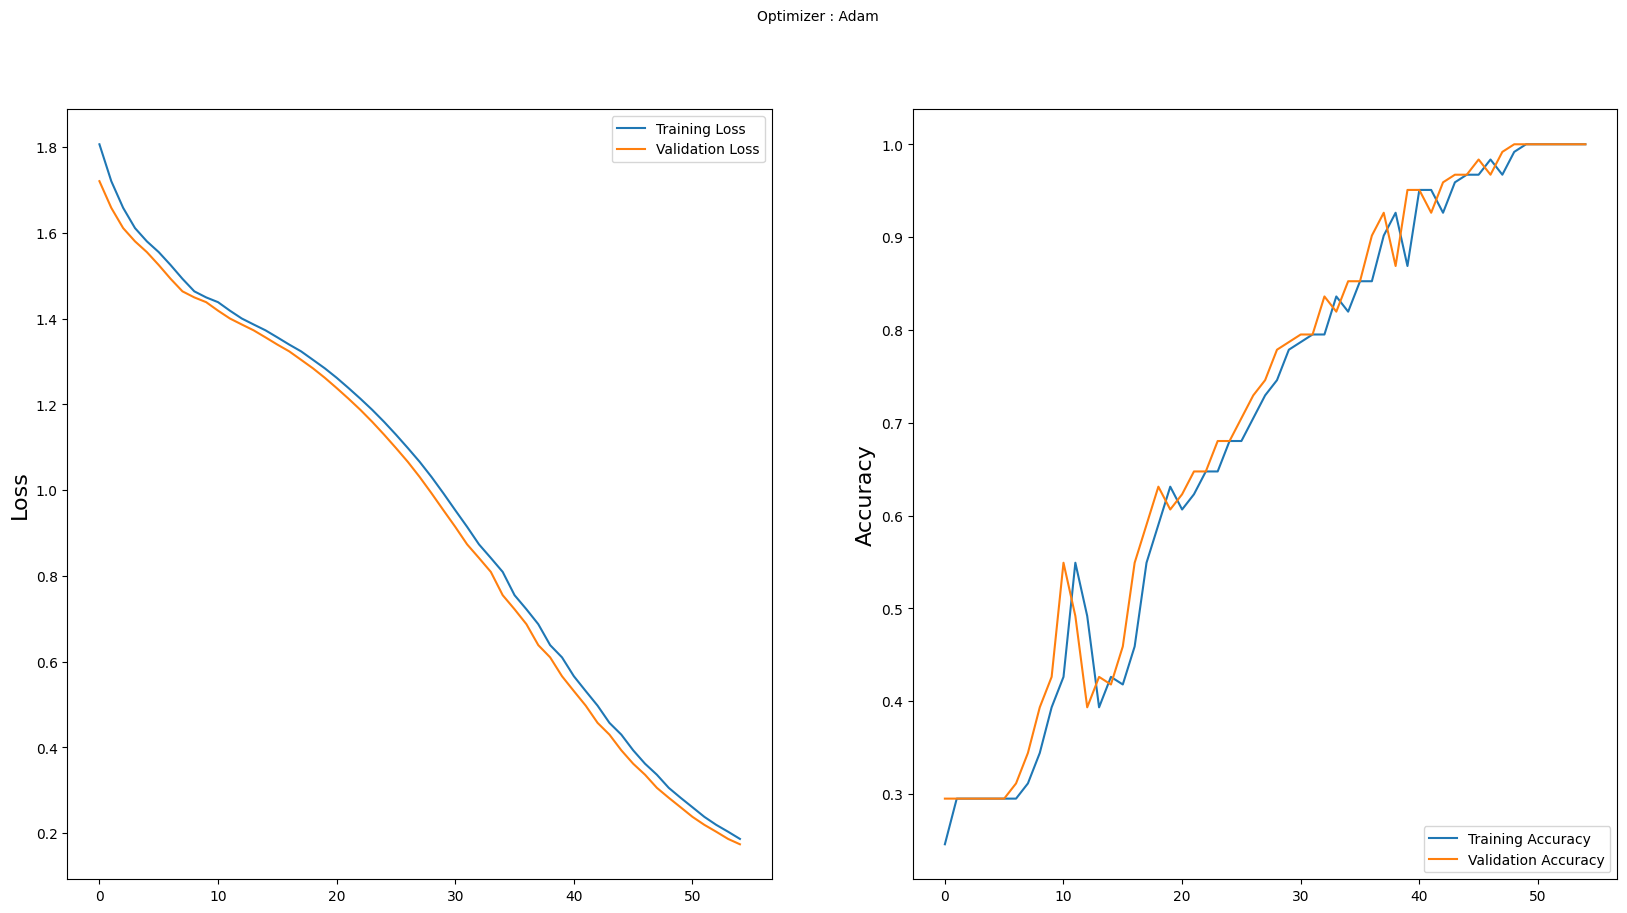

In [ ]:
print_acc(lstmhistory)

In [ ]:
model.save("lstmmodel.keras")
prediction=model.predict(X_test)
print(prediction)

1/1 [==============================] - 1s 868ms/step
[[[2.74786726e-03 1.61933020e-01 6.48903489e-01 1.81146756e-01
   3.96572566e-03 1.30315486e-03]
  [3.95950628e-03 1.61141530e-02 1.05839133e-01 8.41249526e-01
   3.10953259e-02 1.74233480e-03]
  [3.79520236e-04 8.88238009e-03 9.65199113e-01 1.43550262e-02
   1.09949494e-02 1.88999868e-04]
  [2.15125605e-04 2.54814071e-03 9.58682299e-01 2.07067071e-03
   3.63879092e-02 9.58678575e-05]
  [7.69541424e-04 4.64703180e-02 9.16175604e-01 2.80040279e-02
   8.26268923e-03 3.17831466e-04]
  [1.83546916e-03 4.04303381e-03 9.45634767e-03 9.51884806e-01
   3.19411345e-02 8.39339045e-04]
  [4.25805978e-04 2.77416311e-05 4.80325380e-03 1.27416691e-02
   9.81830060e-01 1.71476699e-04]
  [4.30000626e-04 5.85947164e-05 6.10635336e-03 6.09471463e-03
   9.87113178e-01 1.97243367e-04]
  [2.05205940e-03 9.30992484e-01 5.12586981e-02 1.23645784e-02
   2.92065064e-03 4.11428628e-04]
  [1.20153569e-03 4.67670819e-04 1.57573223e-02 1.58974864e-02
   9.660353